# 🧪 Module 1: Data Exploration and Processing

In this module, we will:

1. **Load and Extract the Dataset**: Download and extract the Bike Sharing Dataset from the UCI Machine Learning Repository.
2. **Perform Basic Data Preprocessing**: Clean and prepare the data for analysis.
3. **Conduct Exploratory Data Analysis (EDA)**: Understand the data through visualization and summary statistics.
4. **Save the Processed Data**: Store the cleaned data for future use.

Let's begin!

In [19]:
# Install requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 53.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 305.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 197.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.5/236.5 kB 299.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 219.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.2/573.2 kB 324.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 193.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 252.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 243.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.4/211.4 kB 219.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 kB 336.4 MB/s eta 0:00:00
     ━━━━━━━━━━

## 1. Data Loading and Extraction

We'll start by downloading the dataset and extracting its contents.

In [9]:
import os
import zipfile
import requests

# Define URLs and paths
dataset_url = "https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip"
data_dir = "../data"
raw_dir = os.path.join(data_dir, "raw")

# Create directories if they don't exist
os.makedirs(raw_dir, exist_ok=True)

# Download the dataset
zip_path = os.path.join(raw_dir, "bike_sharing_dataset.zip")
if not os.path.exists(zip_path):
    response = requests.get(dataset_url)
    with open(zip_path, "wb") as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print("Dataset already exists.")

# Extract the dataset
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(raw_dir)
    print("Dataset extracted successfully.")

Dataset already exists.
Dataset extracted successfully.


## 2. Basic Data Preprocessing

We'll load the hour.csv file and perform basic preprocessing steps.

In [10]:
import pandas as pd

# Load the dataset
hour_path = os.path.join(raw_dir, "hour.csv")
df = pd.read_csv(hour_path, header=0, sep=',', parse_dates=['dteday'], index_col='dteday')

# Display the first few rows
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Data Cleaning Steps:

Convert date columns to datetime objects.

Check for missing values.

Rename columns for clarity.

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Rename columns
df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

# Display the first few rows of the processed dataset
df.head()

Missing values in each column:
 instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 3. Exploratory Data Analysis (EDA)

Let's explore the data to understand patterns and relationships.

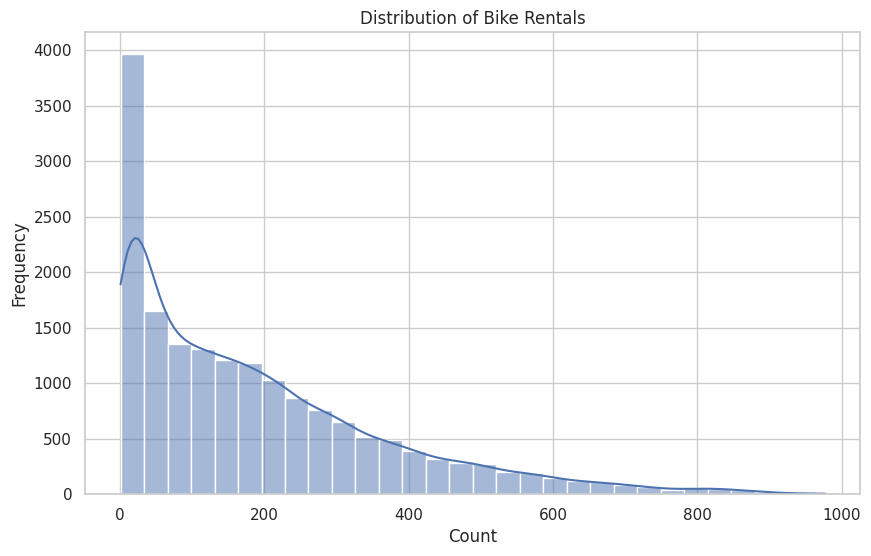

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Distribution of bike rentals
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

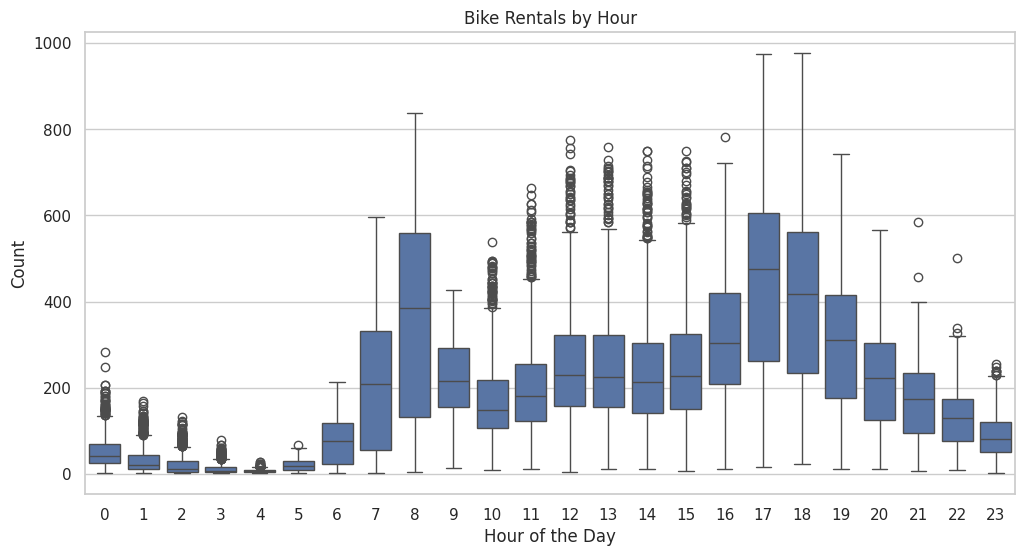

In [13]:
# Bike rentals by hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='count', data=df)
plt.title("Bike Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

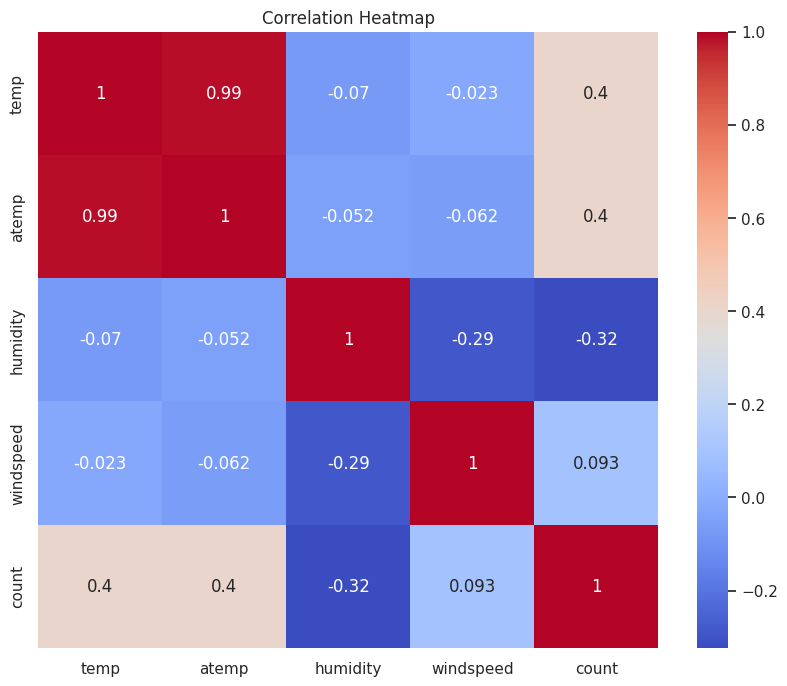

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 4. Save Processed Data

We'll save the cleaned dataset for future use.

In [18]:
import pandas as pd
import os

# Set the start date to the beginning of your data
start_date = df.index.min().replace(day=1, hour=0, minute=0, second=0)
end_date = df.index.max()

# Loop over 12 months
for i in range(12):
    month_start = start_date + pd.DateOffset(months=i)
    month_end = (month_start + pd.DateOffset(months=1)) - pd.Timedelta(seconds=1)
    
    monthly_data = df.loc[month_start:month_end]
    
    filename = f"../data/processed/data_{month_start.strftime('%Y_%m')}.csv"
    monthly_data.to_csv(filename)
    print(f"Saved {filename}")



Saved ../data/processed/data_2011_01.csv
Saved ../data/processed/data_2011_02.csv
Saved ../data/processed/data_2011_03.csv
Saved ../data/processed/data_2011_04.csv
Saved ../data/processed/data_2011_05.csv
Saved ../data/processed/data_2011_06.csv
Saved ../data/processed/data_2011_07.csv
Saved ../data/processed/data_2011_08.csv
Saved ../data/processed/data_2011_09.csv
Saved ../data/processed/data_2011_10.csv
Saved ../data/processed/data_2011_11.csv
Saved ../data/processed/data_2011_12.csv
